In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('ai4i2020 (1).csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


## Data Cleaning and Preparation

In [3]:
df = df.drop(['UDI', 'Product ID'], axis=1)
df['Type'] = LabelEncoder().fit_transform(df['Type'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  int64  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 937.6 KB


## Feature Engineering

In [4]:
df['Temperature Delta [K]'] = df['Process temperature [K]'] - df['Air temperature [K]']
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Temperature Delta [K]
0,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5
1,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5
2,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4
3,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4
4,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5


## Machine Failure Target Distribution

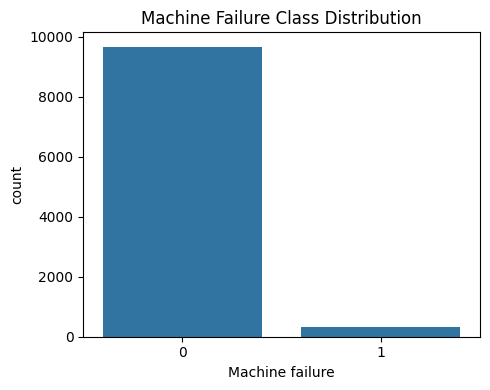

In [5]:
plt.figure(figsize=(5,4))
sns.countplot(x='Machine failure', data=df)
plt.title('Machine Failure Class Distribution')
plt.tight_layout()
plt.show()


## Feature Distributions

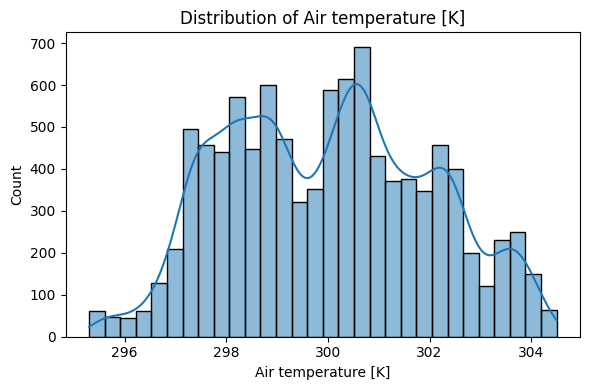

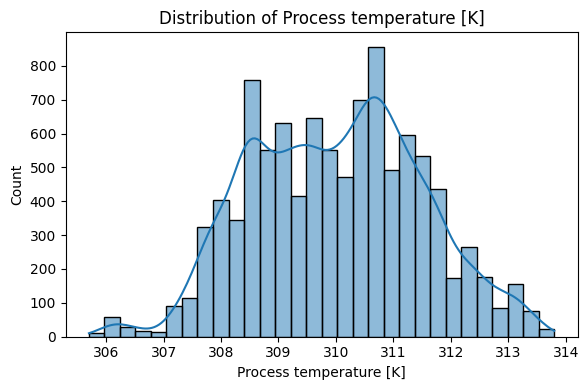

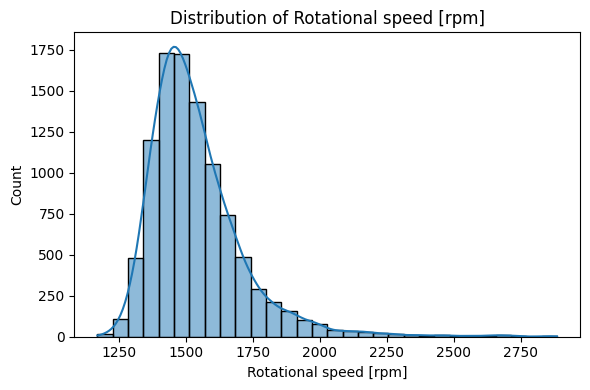

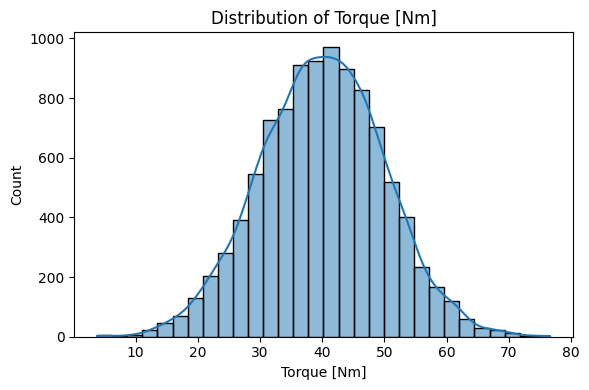

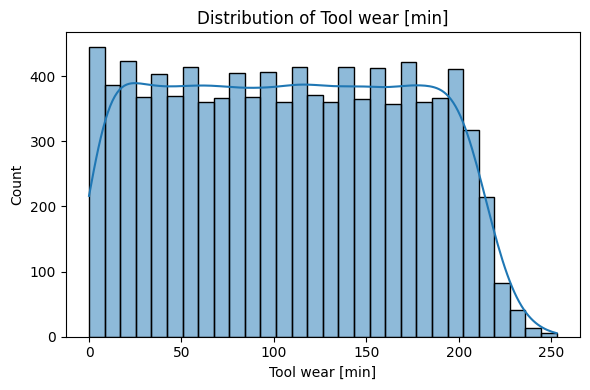

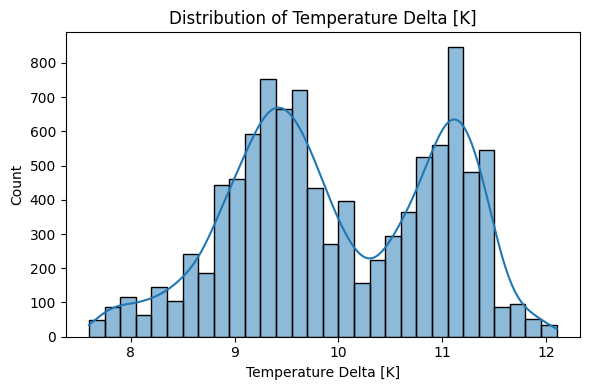

In [6]:
num_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
            'Torque [Nm]', 'Tool wear [min]', 'Temperature Delta [K]']
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

## Feature Correlation Heatmap

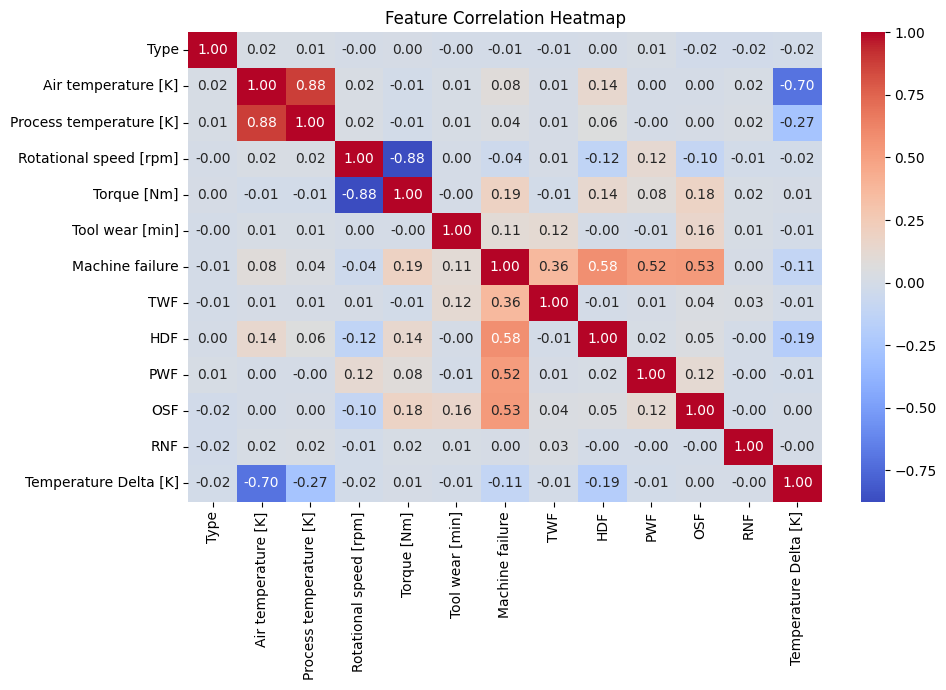

In [7]:
plt.figure(figsize=(10,7))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

## Boxplots: Features vs Machine Failure

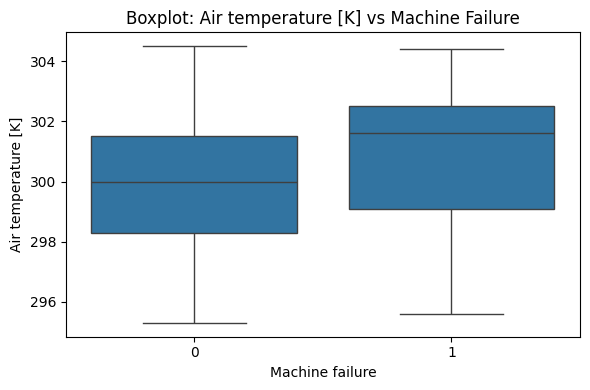

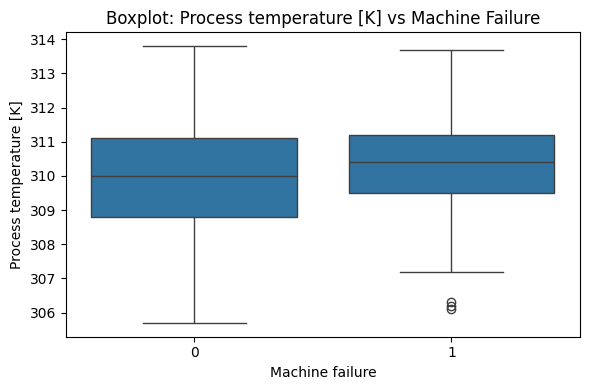

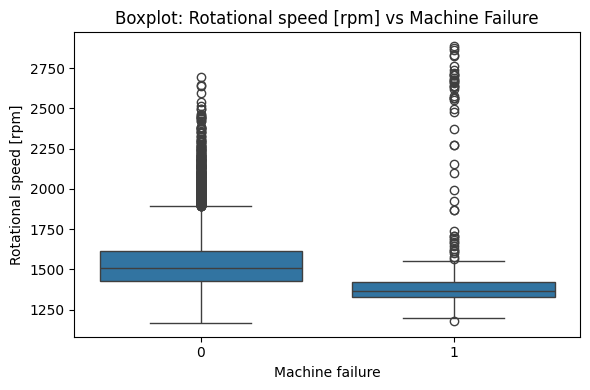

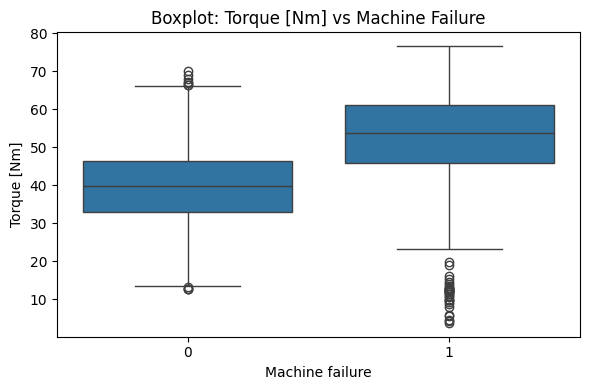

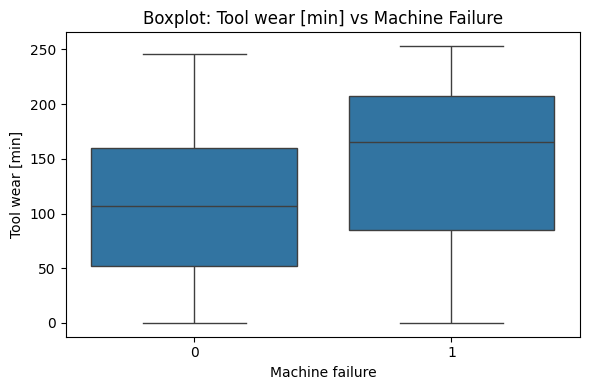

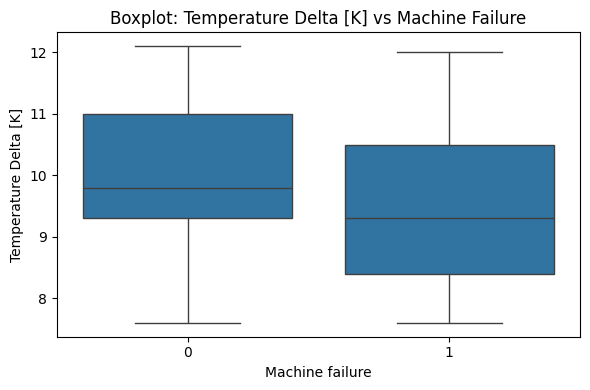

In [8]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Machine failure', y=col, data=df)
    plt.title(f'Boxplot: {col} vs Machine Failure')
    plt.tight_layout()
    plt.show()

## Visualization

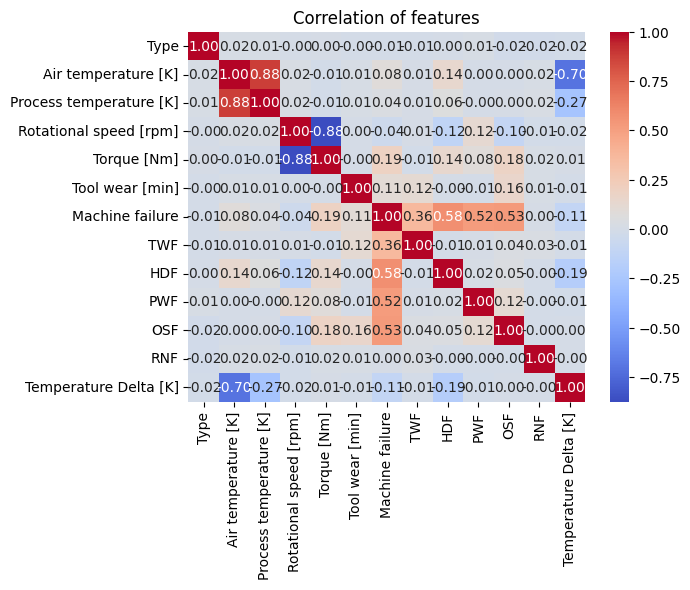

In [13]:
# correlation of features
import seaborn as sns
import matplotlib.pyplot as plt
plt.Figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation of features")
plt.show()

In [24]:
X = df[['Air temperature [K]', 'Process temperature [K]', 'Type', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Temperature Delta [K]']]
y = df['Machine failure']

In [25]:
# For converting all the undefined nan values
X.columns = X.columns.astype(str).str.replace(r'[\[\]<>]', '', regex=True)

In [26]:
# Standardizing the selected feature
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scaled = scale.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)
print("..................................................\n.......................................\n...................................")
print("The standardized form of X features are given as*****.......*******\n.............................\n..................................\n",X_scaled_df.describe)
print("..................................................\n.......................................\n...................................")

..................................................
.......................................
...................................
The standardized form of X features are given as*****.......*******
.............................
..................................
 <bound method NDFrame.describe of       Air temperature K  Process temperature K      Type  \
0             -0.952389              -0.947360  1.333889   
1             -0.902393              -0.879959 -0.332223   
2             -0.952389              -1.014761 -0.332223   
3             -0.902393              -0.947360 -0.332223   
4             -0.902393              -0.879959 -0.332223   
...                 ...                    ...       ...   
9995          -0.602417              -1.082162  1.333889   
9996          -0.552421              -1.082162 -1.998335   
9997          -0.502425              -0.947360  1.333889   
9998          -0.502425              -0.879959 -1.998335   
9999          -0.502425              -0.87995

**********Plot before scaling**********


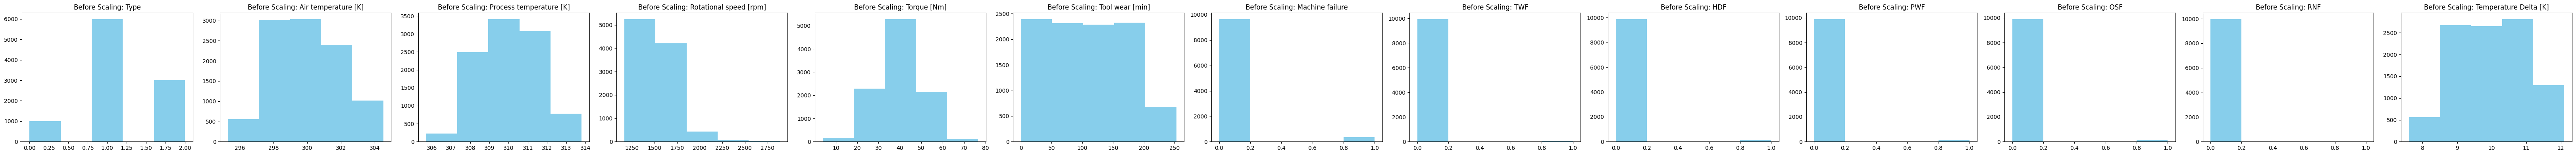

Applying Standardization...
*******Plot after scaling********


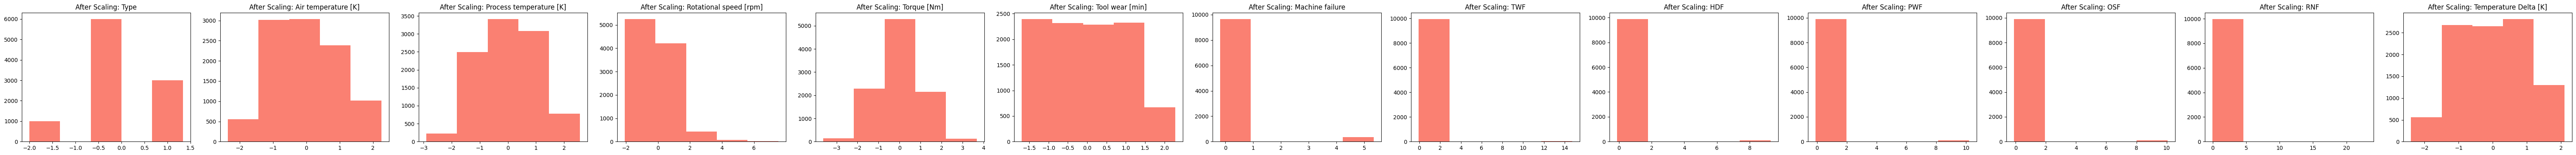

In [28]:
# plotting graphs before and after the standardizations
print("**********Plot before scaling**********")
num_cols = len(df.columns)
fig, axes = plt.subplots(1, num_cols, figsize=(5 * num_cols, 4))
if num_cols == 1:
    axes = [axes]

for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=5, color='skyblue')
    axes[i].set_title(f'Before Scaling: {col}')
plt.tight_layout()
plt.show()

print("Applying Standardization...")
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_array, columns=df.columns)

print("*******Plot after scaling********")
fig, axes = plt.subplots(1, num_cols, figsize=(5 * num_cols, 4))
if num_cols == 1:
    axes = [axes]

for i, col in enumerate(df_scaled.columns):
    axes[i].hist(df_scaled[col], bins=5, color='salmon')
    axes[i].set_title(f'After Scaling: {col}')
plt.tight_layout()
plt.show()

In [29]:
# checking number of counts of target
from collections import Counter
count = Counter(y)
print("The no. of counts of targeted coulmns are...",count)

The no. of counts of targeted coulmns are... Counter({0: 9661, 1: 339})


In [32]:
# balancing the data for proper functioning of mode
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
y_resampled.shape

  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)
Note: you may need to restart the kernel to use updated packages.


(19322,)

In [33]:
from collections import Counter
counts = Counter(y_resampled)
print("Now the balanced data is",counts)

Now the balanced data is Counter({0: 9661, 1: 9661})


## Training the models

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,stratify=y_resampled,random_state=42)
models = {
    "LogisticRegression": LogisticRegression(C=(1.0),penalty="l2",solver="liblinear",max_iter=(500)),
    "Random Forest"     : RandomForestClassifier(),
    "XGBoost"           : XGBClassifier(use_label_encoder=False,eval_metric='logloss'),
    "KNN"               : KNeighborsClassifier(),
    "SVC"               : SVC()
}

results = {}

for name,model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    results[name] = {"Accuray":acc,"f1 score":f1}

import pandas as pd
comparison_df = pd.DataFrame(results).T
print(comparison_df)

c:\Users\kudayraj\OneDrive - Futran Solutions Private Limited\Desktop\Predictive Model\.venv\Lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


                     Accuray  f1 score
LogisticRegression  0.835964  0.833508
Random Forest       0.980336  0.980473
XGBoost             0.989909  0.989920
KNN                 0.944373  0.946210
SVC                 0.829495  0.834380


In [ ]:
import joblib

# Save the model
try:
    joblib.dump(best_model, 'model.pkl')
    print("Model successfully saved as 'model.pkl'")
except Exception as e:
    print(f"Error saving model: {e}")

## # visualizing the moedls comparison

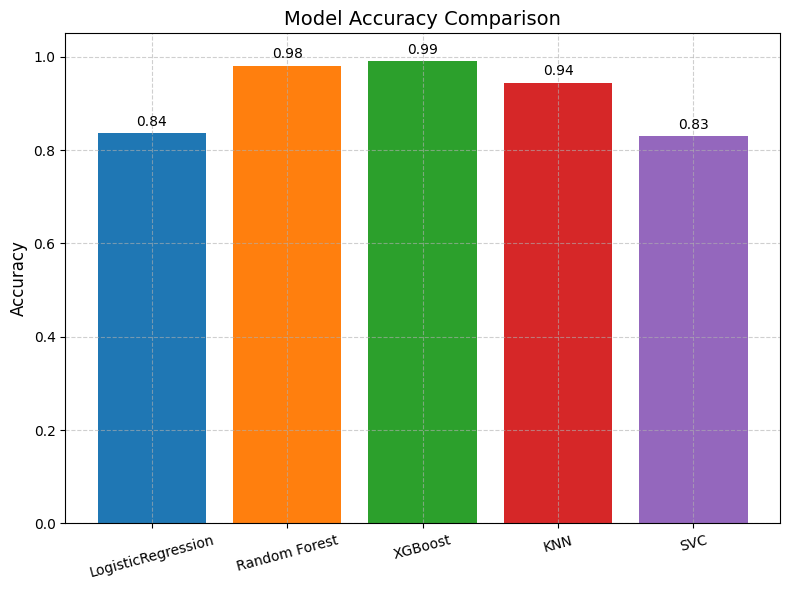

In [42]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



# Lists to store names and accuracy
model_names = []
accuracy_scores = []

# Loop to calculate accuracy
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_names.append(name)
    accuracy_scores.append(acc)

# Set a color palette (can also use sns.color_palette())
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']  # Add more if needed

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, accuracy_scores, color=colors[:len(models)])
plt.ylim(0, 1.05)
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=15, fontsize=10)

# Annotate each bar
for bar, acc in zip(bars, accuracy_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [36]:
# cross validation for checking the average percentage of models score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score
import numpy as np
model = XGBClassifier()
scores = cross_val_score(model,X_resampled,y_resampled,cv=5,scoring='accuracy')
print("Cross validation Accuaracy acore:",scores)
print("Mean Accuaracy,",np.mean(scores))

Cross validation Accuaracy acore: [0.92652005 0.74670116 0.98162526 0.99430642 0.99068323]
Mean Accuaracy, 0.927967224574739


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1933
           1       0.99      0.99      0.99      1932

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865



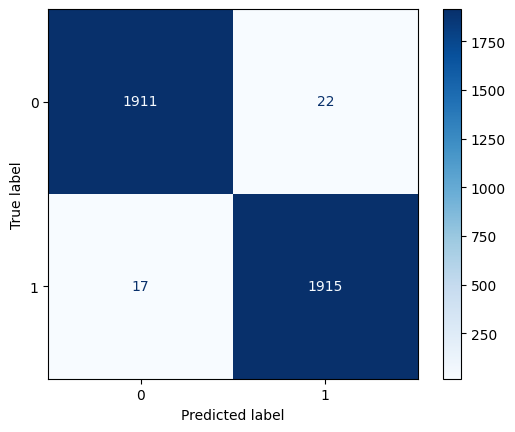

In [37]:
# confuson matrix for checking how much actually it is doing right and wrong

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
print(classification_report(y_test, y_pred))

## Hyperparameter tunning

In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb = XGBClassifier()
param_grid = {
    'C' : [0.01,0.1,1,10,100],
    'penalty' : ['l1','l2'],
    'solver' : ['liblinear'],
    'max_iter' : [100,200,500,1000]
}
grid_search = GridSearchCV(estimator= xgb,
                           param_grid = param_grid,
                           cv = 5,
                           scoring = 'accuracy',
                           verbose = 2,
                           n_jobs = -1)
grid_search.fit(X_train,y_train)
print("Best parameters:",grid_search.best_params_)
print("Best cross validation score",grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
# print(confusion_matrix(y_test,y_pred))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[13:38:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "C", "max_iter", "penalty", "solver" } are not used.

Best parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross validation score 0.988936937894643
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1933
           1       0.99      0.99      0.99      1932

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865



In [ ]:
import joblib

# Save the best model
joblib.dump(best_model, 'model.pkl')
print("Model saved as 'model.pkl'")

## ROC and AUC curve

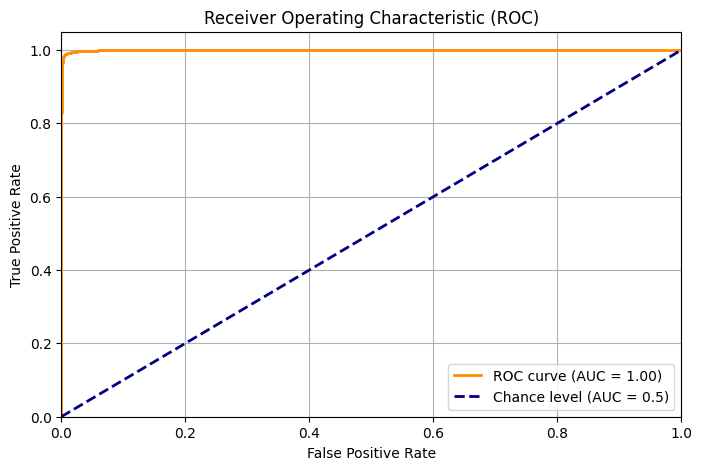

In [39]:
from sklearn.metrics import roc_curve,auc
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
y_probs = model.predict_proba(X_test)[:,1]
fpr , tpr , thresholds = roc_curve(y_test,y_probs)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance level (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
import joblib

# Save the best model
joblib.dump(best_model, 'model.pkl')
print("Model saved as 'model.pkl'")

In [ ]:
# Save the trained model
import joblib

try:
    joblib.dump(best_model, 'model.pkl')
    print("Model successfully saved as 'model.pkl'")
except Exception as e:
    print(f"Error saving model: {e}")
    # If there's an error, let's print some debug information
    print("\nDebug information:")
    print(f"Type of best_model: {type(best_model)}")
    print("Available variables:", list(globals().keys()))